<a href="https://colab.research.google.com/github/Somnath1998g/Projects/blob/main/rain_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rain Prediction
Here I take a data set of Rain prediction in Australia. By the given data I have to predict next day rain in Australia.

## Important Libraries

In [ ]:
!pip install plotly matplotlib seaborn --quiet
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
from sklearn.impute import SimpleImputer
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
od.version()

'0.1.22'

## Loding Dataset

In [ ]:
dataset_url="https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package"

In [ ]:
od.download(dataset_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [ ]:
import os

In [ ]:
data_dir="./weather-dataset-rattle-package"

In [ ]:
os.listdir(data_dir)

['weatherAUS.csv']

In [ ]:
train_csv=data_dir+'/weatherAUS.csv'

In [ ]:
train_csv

'./weather-dataset-rattle-package/weatherAUS.csv'

In [ ]:
!pip install pandas --quiet

In [ ]:
import pandas as pd

In [ ]:
raw_df=pd.read_csv(train_csv)

In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### About the data
The dataset contains about 10 years of daily weather observations from different locations across Australia. Observations were drawn from numerous weather stations.

In this project, I will use this data to predict whether or not it will rain the next day. There are 23 attributes including the target variable "RainTomorrow", indicating whether or not it will rain the next day or not.

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Here we can see that 3267 entries in our terget column is empty. So we drop that rows

## Data Visualization and Cleaning
Here we see:


*   Clean the null rows from terget column
*   Count plot of target column
*   Correlation amongst numeric attributes by graph


In [ ]:
raw_df.dropna(subset=['RainTomorrow','RainToday'],inplace= True)

After droping the raws

In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


Now we see how many unique location is present

In [ ]:
raw_df.Location.nunique(dropna = True)

49

So 49 unique locations are present in the data.

Here we can see RainToday and RainTomorrow's null values are deleted.

In [ ]:
raw_df.isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

Now we see our data is imbalanced or not

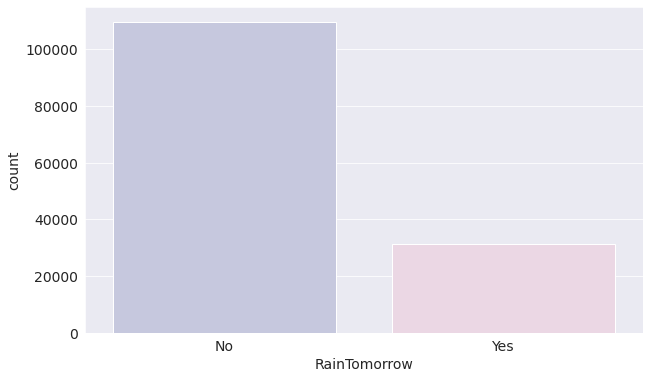

In [ ]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= raw_df["RainTomorrow"], palette= cols);

Now we see the correlation among numeric attributes

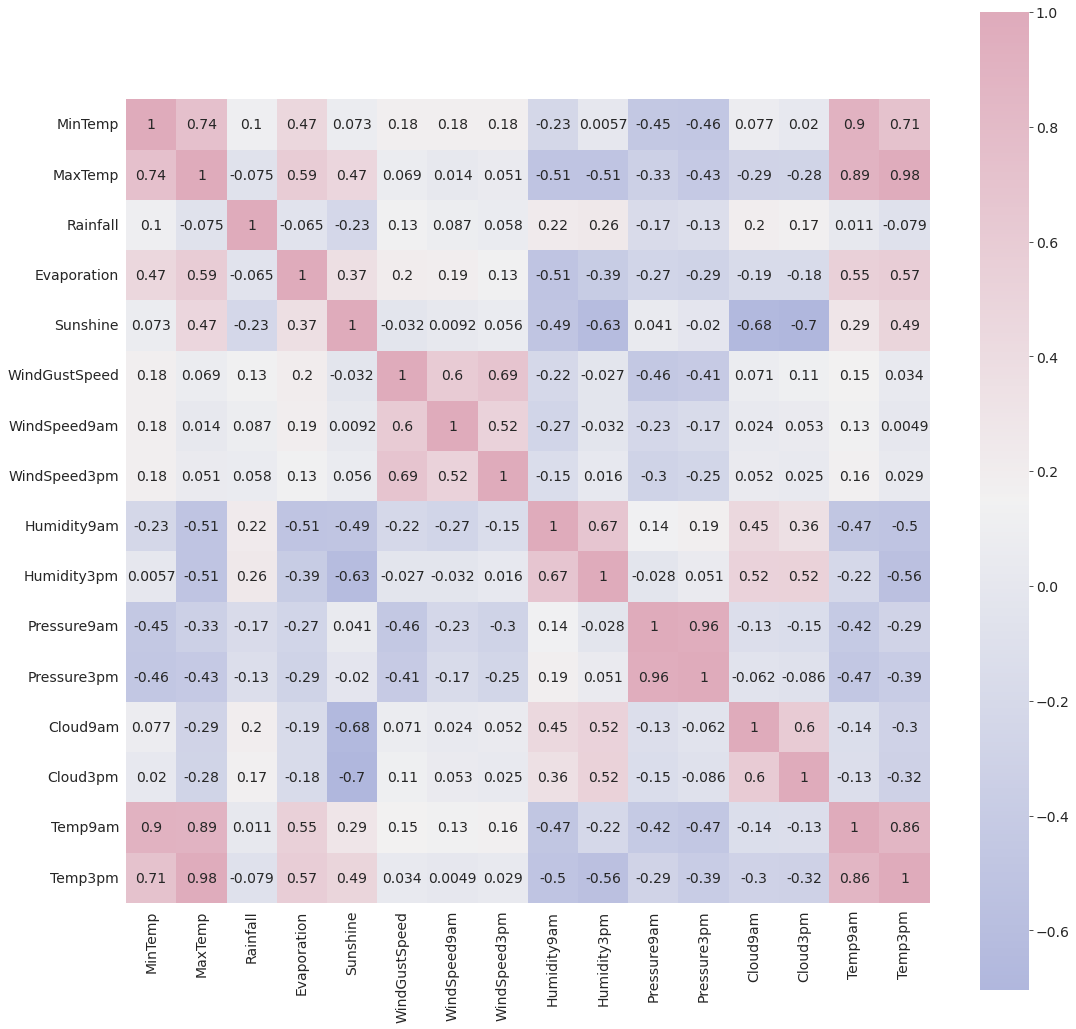

In [ ]:
corrmat = raw_df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

Here we see the number of rainy days in each location.

In [ ]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [ ]:
px.histogram(raw_df,x='Temp3pm',title='Temperature at 3pm vs. RainTomorrow',color='RainTomorrow')

From the graph we can see that when the Temperature at 3pm is around 20, Rain Tomorrow is high.
Now we see the relation between Temperature at 3pm and Wind speed at 3pm .

In [ ]:
px.scatter(raw_df.sample(2000), 
           title='Temp (3 pm) vs. Wind Speed (3 pm)',
           x='Temp3pm',
           y='WindSpeed3pm',
           color='RainTomorrow')

Here we can see that relation between Temperature at 3pm and Wind speed at 3pm is not so strong.
Also we can check relation between Temperature at 3pm and Pressure at 3pm.

In [ ]:
px.scatter(raw_df.sample(2000),title='Temp (3 pm) vs. Pressure (3 pm)',
           x='Temp3pm',y='Pressure3pm',
           color='RainTomorrow')

Here we can see that relation between Temperature at 3pm and Pressure at 3pm is not so strong.
Now we check relation between Max temperature and min temperature.

In [ ]:
px.scatter(raw_df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

Here we can see that relation between Max temperature and Min temperature have much strong relation than previous relations.

## Training, Validation and Test sets

Here we visualize our data year wise

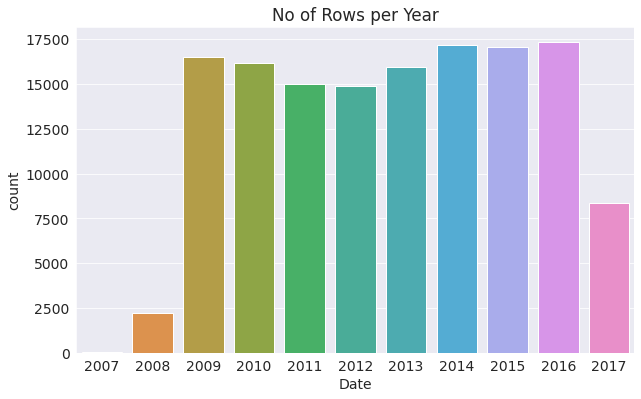

In [ ]:
plt.title('No of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

While working with chronological data, it's often a good idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

We'll use the data till 2014 for the training set, data from 2015 for the validation set, and the data from 2016 & 2017 for the test set.

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year

In [ ]:
train_df= raw_df[year < 2015]
val_df = raw_df[year==2015]
test_df = raw_df[year>2015]

In [ ]:
print('train_df.shape : ', train_df.shape)
print('Val_df.shape : ', val_df.shape)
print('test_df.shape : ', test_df.shape)

train_df.shape :  (97988, 23)
Val_df.shape :  (17089, 23)
test_df.shape :  (25710, 23)


## Input and Target Columns
Here we define the input and terget columns.

In [ ]:
input_cols= list(train_df)[1:-1]
target_col='RainTomorrow'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Now we see the numeric and catagorical columns

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


## Data Preprocessing

### Inputing missing numerical values
Here we fill the missing values of numerical column by taking the mean of their repected columns.

In [ ]:
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols]= imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]= imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]= imputer.transform(test_inputs[numeric_cols])

In [ ]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
val_inputs[numeric_cols].isna().sum().sum()

0

In [ ]:
train_inputs[numeric_cols].isna().sum().sum()

0

So here we can see that none of the numeric columns are null.

### Scaling Numeric Features
Here we sacling the numeric data in the range of [0,1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalar=MinMaxScaler().fit(raw_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scalar.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scalar.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scalar.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.0,0.013233,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0304,0.0,0.0,0.027426,0.005758
max,1.0,1.000000,1.0,0.568276,0.986207,1.0,0.669231,1.0,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,0.988484


### Encoding Categorical Data
Here we encoding the categorical data to numerical value on the basis of there presence or absence.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-121-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-121-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-121-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-121-8950d7c1751d>:1: PerformanceWarning:

In [ ]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
2498,Albury,0.681604,0.801512,0.000000,0.037741,0.526244,ENE,0.372093,NaN,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037741,0.526244,SSE,0.341085,SSE,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037741,0.526244,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.538752,0.042049,0.037741,0.526244,SSE,0.255814,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,Albury,0.566038,0.523629,0.018329,0.037741,0.526244,ENE,0.193798,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.283019,0.502836,0.000000,0.037741,0.526244,E,0.193798,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145455,Uluru,0.266509,0.533081,0.000000,0.037741,0.526244,E,0.193798,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,Uluru,0.285377,0.568998,0.000000,0.037741,0.526244,NNW,0.124031,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,Uluru,0.327830,0.599244,0.000000,0.037741,0.526244,N,0.240310,SE,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Here we can see categorical columns are changed into binary columns.
Now we drop the categorical columns and just left with numerical columns. 

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.599057,0.718336,0.000000,0.037741,0.526244,0.286822,0.184615,0.298851,0.22,0.13,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144549,0.556604,0.786389,0.000000,0.037741,0.526244,0.193798,0.146154,0.229885,0.16,0.08,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144550,0.608491,0.805293,0.000000,0.037741,0.526244,0.255814,0.200000,0.103448,0.15,0.08,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144551,0.674528,0.818526,0.000000,0.037741,0.526244,0.286822,0.215385,0.195402,0.22,0.09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Here we can see that all columns are numeric.

## Train the model
Here we use Random Forest to train our model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth=26,max_leaf_nodes=2**20,n_estimators=400)

In [ ]:
%%time
model.fit(X_train, train_targets)

CPU times: user 2min 52s, sys: 11.8 s, total: 3min 4s
Wall time: 2min 9s


RandomForestClassifier(max_depth=26, max_leaf_nodes=1048576, n_estimators=400,
                       n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train, train_targets)

0.9837122913009756

Here we can see that accuracy on train set is 98.37%

In [ ]:
model.score(X_val, val_targets)

0.8571595763356545

Now here we can see that the accuracy on validation set is 85.71% .

## Visualization of tree and important features
Here we can visualize the decision tree learned from the training data.

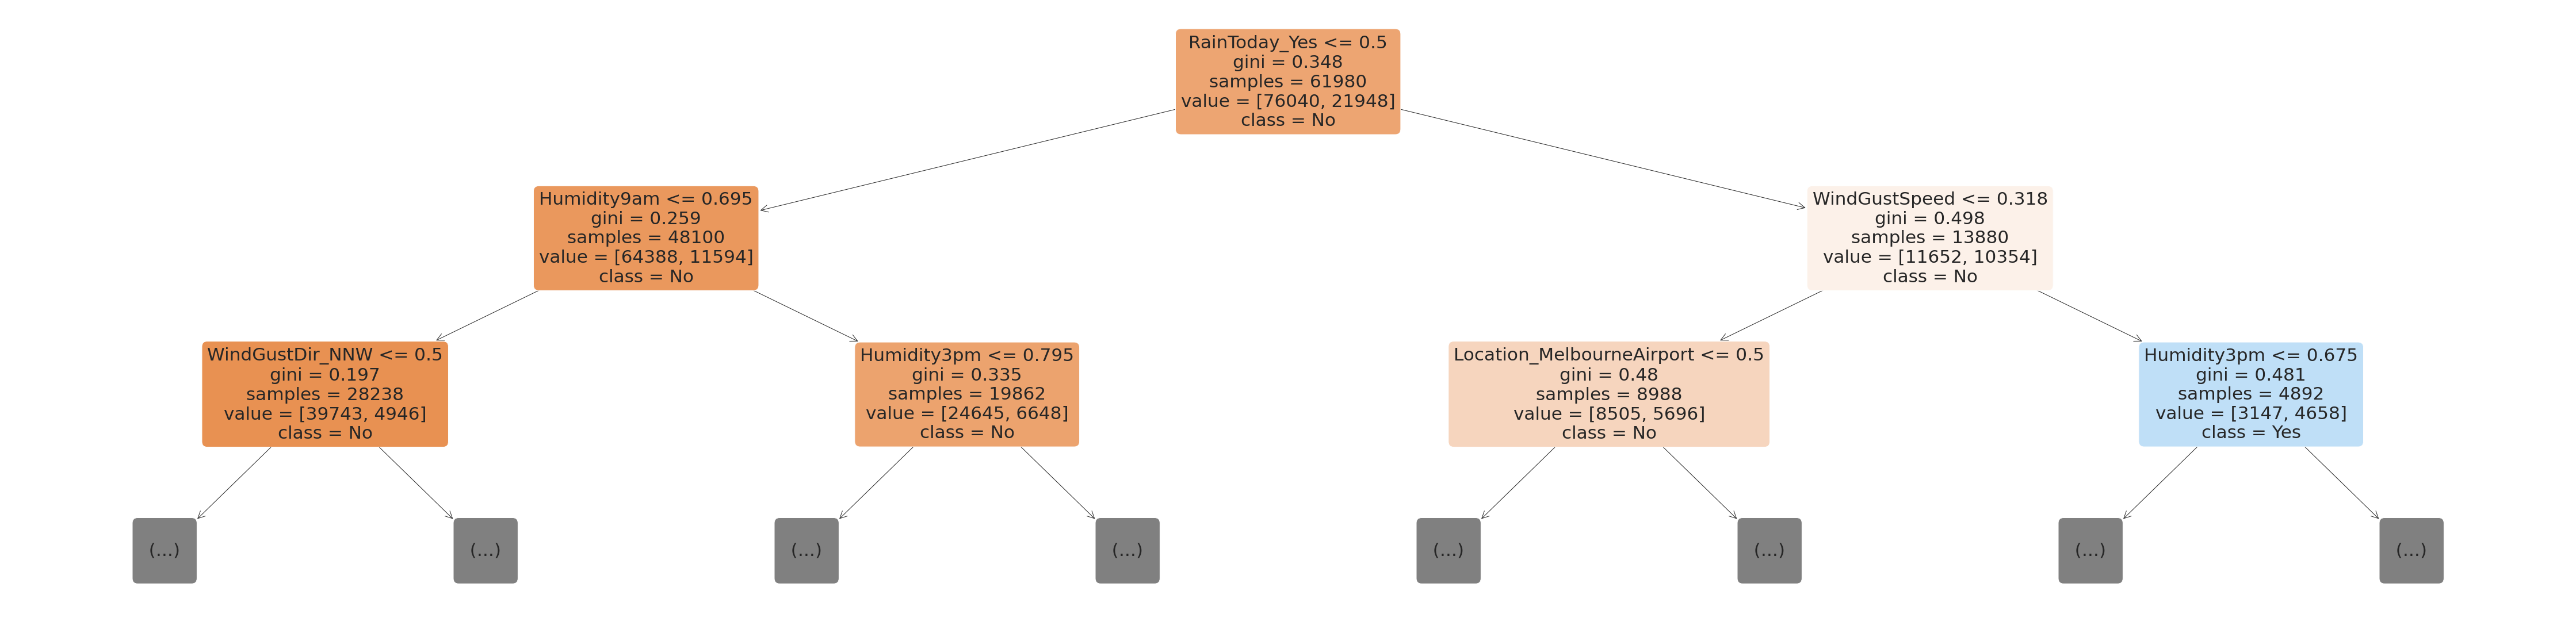

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

Here we can also display the trees as text, which can be easier to follow for deeper trees.

Now we see random forests assign an "importance" to each feature, by combining the importance values from individual trees.

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance',ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.145183
4,Sunshine,0.059037
11,Pressure3pm,0.053402
8,Humidity9am,0.049563
10,Pressure9am,0.049044
2,Rainfall,0.047783
5,WindGustSpeed,0.047771
15,Temp3pm,0.043477
13,Cloud3pm,0.040042
1,MaxTemp,0.039652


Here we can see that Humidity at 3pm is most important feature.
Now we visualize this fact.

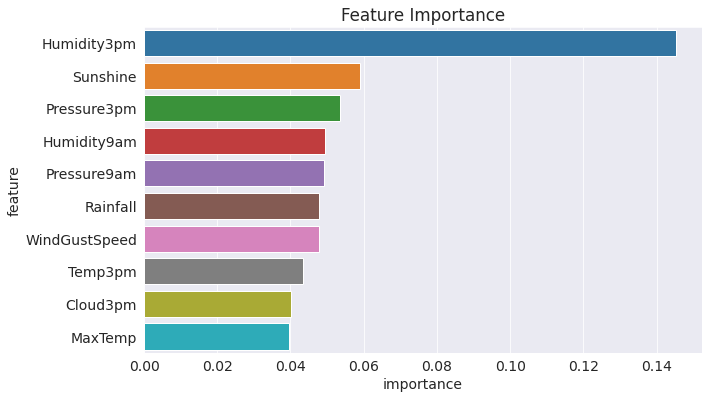

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Conclusions
Here we can see that our model gives 85.71% accuracy on validation set, Which is a good accuracy.